## Final Project Submission

Please fill out:
* Student name: Victor Kang
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [102]:
# Your code here - remember to use markdown cells for comments as well!

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv("data/kc_house_data.csv")

In [105]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [107]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [108]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [109]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [110]:
df["condition"]

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [111]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.



BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. 
        Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [112]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [113]:
#df = df.drop(['id', 'view', 'zipcode','lat', 'long','sqft_living15','sqft_lot15' ], axis=1)
#df

In [114]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [116]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [117]:
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [119]:
df['age_when_sold'] = df['year_sold'] - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


In [120]:
df["age_when_sold"].value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age_when_sold, Length: 117, dtype: int64

In [121]:
df["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [122]:
df[df["age_when_sold"] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
1761,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,Average,...,2015,NaN,98040,47.5784,-122.226,2230,10000,6,2014,-1
2685,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,Average,...,2015,NaN,98144,47.5756,-122.316,1440,4800,10,2014,-1
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,Average,...,2015,0.0,98072,47.7685,-122.160,2520,6126,12,2014,-1
8032,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,...,2015,NaN,98144,47.6001,-122.298,1320,1852,6,2014,-1
14475,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,Average,...,2015,NaN,98199,47.6514,-122.385,1570,6000,8,2014,-1
17084,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,Average,...,2015,0.0,98122,47.6074,-122.305,1480,3600,6,2014,-1
19789,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,Average,...,2015,0.0,98122,47.6047,-122.305,1380,1495,8,2014,-1
20754,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,Average,...,2015,0.0,98133,47.7384,-122.348,1970,18110,8,2014,-1
20836,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,Average,...,2015,0.0,98103,47.6725,-122.330,1800,4560,7,2014,-1
20947,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,Average,...,2015,0.0,98144,47.5951,-122.301,1350,3000,7,2014,-1


In [123]:
#for house in df:
#    if house['age_when_sold'] == -1:
#        house['age_when_sold'] = 0 


In [124]:
df['age_when_sold'] = df['age_when_sold'].apply(lambda x: 0 if x == -1 else x)

In [125]:
df["age_when_sold"].value_counts()

9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: age_when_sold, Length: 116, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [127]:
df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [128]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0.0
1,2570,7242,2170,400.0
2,770,10000,770,0.0
3,1960,5000,1050,910.0
4,1680,8080,1680,0.0
5,5420,101930,3890,1530.0
6,1715,6819,1715,?
7,1060,9711,1060,0.0
8,1780,7470,1050,730.0
9,1890,6560,1890,0.0


In [129]:
df.loc[df['sqft_basement'] == '?'][['sqft_living','sqft_lot','sqft_above','sqft_basement']]

,sqft_living,sqft_lot,sqft_above,sqft_basement
6,1715,6819,1715,?
18,1200,9850,1200,?
42,3595,5639,3595,?
79,3450,39683,3450,?
112,1540,12600,1160,?
...,...,...,...,...
21442,2360,5000,1390,?
21447,2330,4907,2330,?
21473,980,1010,980,?
21519,2380,5737,2380,?


In [130]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [131]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1920.0    0.000046
3480.0    0.000046
2730.0    0.000046
2720.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [132]:
#df['sqft_basement'] = df['sqft_basement'].map(lambda x: (x['sqft_living'] - x['sqft_above']) if x == '?' else x['sqft_basement'])

#recheck this code

#for x in df['sqft_basement']:
    #if x == '?':
df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 



In [133]:
df['sqft_basement'].value_counts(normalize=True)

0      0.607029
600    0.010233
700    0.010094
500    0.009909
800    0.009538
         ...   
518    0.000046
374    0.000046
784    0.000046
906    0.000046
248    0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [134]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [135]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0
1,2570,7242,2170,400
2,770,10000,770,0
3,1960,5000,1050,910
4,1680,8080,1680,0
5,5420,101930,3890,1530
6,1715,6819,1715,0
7,1060,9711,1060,0
8,1780,7470,1050,730
9,1890,6560,1890,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [137]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [138]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2013.0    0.001746
2003.0    0.001746
2007.0    0.001690
            ...   
1951.0    0.000056
1953.0    0.000056
1946.0    0.000056
1976.0    0.000056
1948.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [139]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [140]:
df['waterfront'].isna().sum()

2376

In [141]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [142]:
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x == 'YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [144]:
df['yr_renovated'].isna().sum()

3842

In [145]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [146]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [147]:
df['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [148]:
def reno(year):
    if year > 1999:
        return 1
    else:
        return 0

df['recent_reno']  = df['yr_renovated'].apply(reno)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [150]:
df['recent_reno'].sum()

379

In [151]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,recent_reno
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,0


In [152]:
df = df.drop(['date', 'yr_built','yr_renovated' ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,...,0,98178,47.5112,-122.257,1340,5650,10,2014,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,...,400,98125,47.7210,-122.319,1690,7639,12,2014,63,0
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,...,0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,...,910,98136,47.5208,-122.393,1360,5000,12,2014,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,...,0,98074,47.6168,-122.045,1800,7503,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,8 Good,...,0,98103,47.6993,-122.346,1530,1509,5,2014,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,8 Good,...,0,98146,47.5107,-122.362,1830,7200,2,2015,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,7 Average,...,0,98144,47.5944,-122.299,1020,2007,6,2014,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,...,0,98027,47.5345,-122.069,1410,1287,1,2015,11,0


In [153]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [154]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [155]:
condition_key = {'Poor':1.0 , 'Fair':2.0 , 'Average':3.0 , 'Good':4.0 , 'Very Good':5.0}

In [156]:
grade_key = {'3 Poor':3.0,
             '4 Low':4.0,
             '5 Fair':5.0,
             '6 Low Average':6.0,
             '7 Average': 7.0,
             '8 Good':8.0,
             '9 Better':9.0,
             '10 Very Good':10.0,
             '11 Excellent':11.0,
             '12 Luxury': 12.0,
             '13 Mansion':13.0}

In [157]:
view_key = {'NONE':1.0 , 'AVERAGE':2.0 , 'GOOD':3.0 , 'FAIR':4.0 , 'EXCELLENT':5.0}

In [158]:
df['view'] = df['view'].replace(view_key)

In [159]:
df['condition'] = df['condition'].replace(condition_key)

In [160]:
df['grade'] = df['grade'].replace(grade_key)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  year_s

In [162]:
df['condition'].value_counts()

3.0    14020
4.0     5677
5.0     1701
2.0      170
1.0       29
Name: condition, dtype: int64

In [163]:
df['condition'].value_counts(normalize=True)

3.0    0.649164
4.0    0.262861
5.0    0.078761
2.0    0.007871
1.0    0.001343
Name: condition, dtype: float64

In [164]:
df['grade'].value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [165]:
df['grade'].value_counts(normalize=True)

7.0     0.415521
8.0     0.280826
9.0     0.121082
6.0     0.094365
10.0    0.052507
11.0    0.018475
5.0     0.011205
12.0    0.004121
4.0     0.001250
13.0    0.000602
3.0     0.000046
Name: grade, dtype: float64

In [166]:
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [167]:
df['price'].max()

7700000.0

In [168]:
df['bedrooms'].sort_values(ascending=False).head(10)

15856    33
8748     11
13301    10
19239    10
15147    10
6073      9
4231      9
16830     9
8537      9
4092      9
Name: bedrooms, dtype: int64

In [169]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,recent_reno
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,1.196480,3.409825,7.657915,...,291.725008,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,2014.322962,43.323841,0.017549
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.688242,0.650546,1.173200,...,442.667800,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,0.467619,29.376456,0.131307
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,3.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,1.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,1.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,2014.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,1.000000,4.000000,8.000000,...,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,5.000000,13.000000,...,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,115.000000,1.000000


In [170]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21534.0,1.196480,0.688242,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [171]:
df = df.drop('year_sold', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,0
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [172]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21534.0,1.196480,0.688242,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  age_wh

In [174]:
df['view'].value_counts()

1.0    19422
2.0      957
3.0      508
4.0      330
5.0      317
Name: view, dtype: int64

In [175]:
df['view'].value_counts(normalize=True)

1.0    0.901923
2.0    0.044441
3.0    0.023591
4.0    0.015325
5.0    0.014721
Name: view, dtype: float64

In [176]:
df['view'].fillna(1.0, inplace=True)

In [177]:
#continuous = ['sqft_living' , 'sqft_lot' , 'sqft_above' , 'sqft_basement']

In [178]:
#discrete = ['bedrooms' , 'bathrooms' , 'floors' , 'age_when_sold']

In [179]:
#categorical = ['waterfront' , 'condition' , 'grade' , 'month_sold' , 'recent_reno'] 

In [180]:
#df[continuous+ ['price']].corr()


<AxesSubplot:>

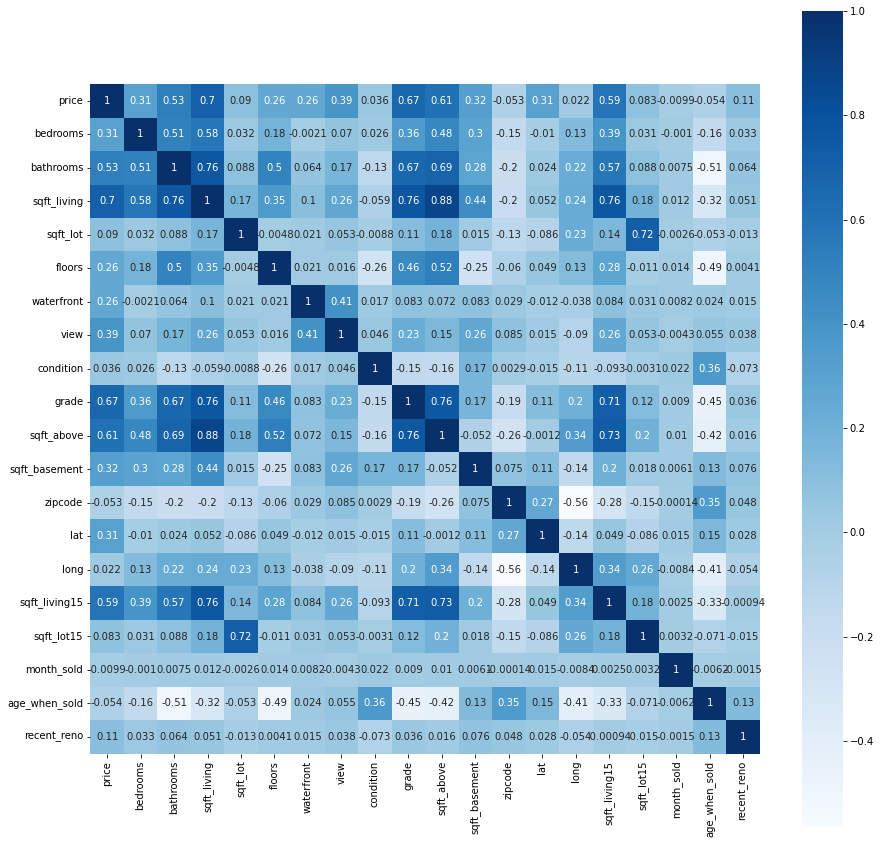

In [181]:
plt.figure(figsize=(15,15))
#sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues", mask=np.triu(np.ones_like(df.corr(), dtype=bool)),)
sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues")

In [182]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.386430,0.036056,0.667951,0.605368,0.323799,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928,-0.053896,0.106004
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.070475,0.026496,0.356563,0.479386,0.302808,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046,-0.155824,0.032953
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.169760,-0.126479,0.665838,0.686668,0.283440,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543,-0.507568,0.063790
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.262220,-0.059445,0.762779,0.876448,0.435130,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112,-0.318599,0.051035
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.052990,-0.008830,0.114731,0.184139,0.015418,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591,-0.052860,-0.013414
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.016413,-0.264075,0.458794,0.523989,-0.245715,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245,-0.489500,0.004076
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.412224,0.016648,0.082818,0.071778,0.082800,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.008199,0.024405,0.014795
view,0.386430,0.070475,0.169760,0.262220,0.052990,0.016413,0.412224,1.000000,0.046191,0.227019,0.149484,0.264325,0.085281,0.014710,-0.090301,0.260412,0.053175,-0.004335,0.055097,0.038353
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.046191,1.000000,-0.146896,-0.158904,0.173849,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388,0.360834,-0.072814
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.227019,-0.146896,1.000000,0.756073,0.168220,-0.185771,0.113575,0.200341,0.713867,0.120981,0.008989,-0.448321,0.035664


In [183]:
most_correlated = "sqft_living"

In [184]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition        float64
grade            float64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month_sold         int64
age_when_sold      int64
recent_reno        int64
dtype: object

In [185]:
#df['waterfront'] = df['waterfront'].apply(lambda x: 0 if False else 1)
#df['recent_reno'] = df['recent_reno'].apply(lambda x: 0 if False else 1)

In [186]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition        float64
grade            float64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month_sold         int64
age_when_sold      int64
recent_reno        int64
dtype: object

In [187]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,1.195907,0.687319,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [188]:
#just trying stats models OLS here with all features to see what we get

In [189]:
X = df.drop('price', axis=1)
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2824.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:22   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21578   BIC:                         5.888e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.509e+06   2.87e+06      0.526      0.599   -4.12e+06    7.14e+06
bedrooms       -3.63e+04   1893.367    -19.170      0.000      -4e+04   -3.26e+04
bathrooms       4.11e+04   3246.765     12.659      0.000    3.47e+04    4.75e+04
sqft_living     110.1499      2.270     48.518      0.000     105.700     114.600
sqft_lot          0.1420      0.048      2.972      0.003       0.048       0.236
floors         9134.6137   3585.661      2.548      0.011    2106.454    1.62e+04
waterfront     6.007e+05   1.83e+04     32.759      0.000    5.65e+05    6.37e+05
view            6.13e+04   2359.500     25.982      0.000    5.67e+04    6.59e+04
condition      2.799e+04   2334.588     11.989      0.000    2.34e+04    3.26e+04
grade          9.717e+04   2152.726     45.139      0.000     9.3e+04    1.01e+05
sqft_above       70.7615      2.245     31.519      0.000      66.361      75.162
sqft_basement    39.3889      2.636     14.943      0.000      34.222      44.556
zipcode        -578.7435     32.847    -17.619      0.000    -643.126    -514.361
lat            5.975e+05   1.07e+04     55.930      0.000    5.77e+05    6.18e+05
long          -2.125e+05   1.31e+04    -16.198      0.000   -2.38e+05   -1.87e+05
sqft_living15    22.1472      3.438      6.442      0.000      15.408      28.886
sqft_lot15       -0.3725      0.073     -5.095      0.000      -0.516      -0.229
month_sold    -2745.5243    438.681     -6.259      0.000   -3605.371   -1885.678
age_when_sold  2664.8986     70.095     38.019      0.000    2527.508    2802.289
recent_reno     9.98e+04   1.07e+04      9.291      0.000    7.87e+04    1.21e+05
==============================================================================
Omnibus:                    18420.005   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1905176.508
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.453   Cond. No.                     3.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [190]:
#Quick model try above

In [191]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition        float64
grade            float64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month_sold         int64
age_when_sold      int64
recent_reno        int64
dtype: object

In [192]:
#establish baseline simple linear regression model using only most correlated feature

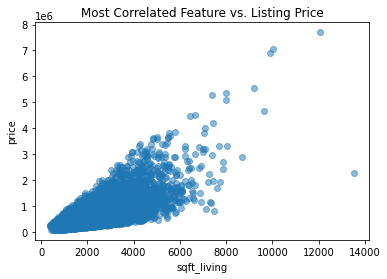

In [193]:
fig, ax = plt.subplots()

ax.scatter(df[most_correlated], df['price'], alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [194]:
baseline_model = LinearRegression()


In [195]:

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[[most_correlated]],
    y=df['price'],
    return_train_score=True,
    cv=splitter
)



In [196]:
baseline_scores

{'fit_time': array([0.00390911, 0.00219011, 0.00242496]),
 'score_time': array([0.0010376 , 0.00118995, 0.00118303]),
 'test_score': array([0.48322208, 0.50717038, 0.51680952]),
 'train_score': array([0.4951006 , 0.48588579, 0.48225339])}

In [197]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [198]:
## score improved.. but. what am i really doing up there. following lab

In [199]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition        float64
grade            float64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month_sold         int64
age_when_sold      int64
recent_reno        int64
dtype: object

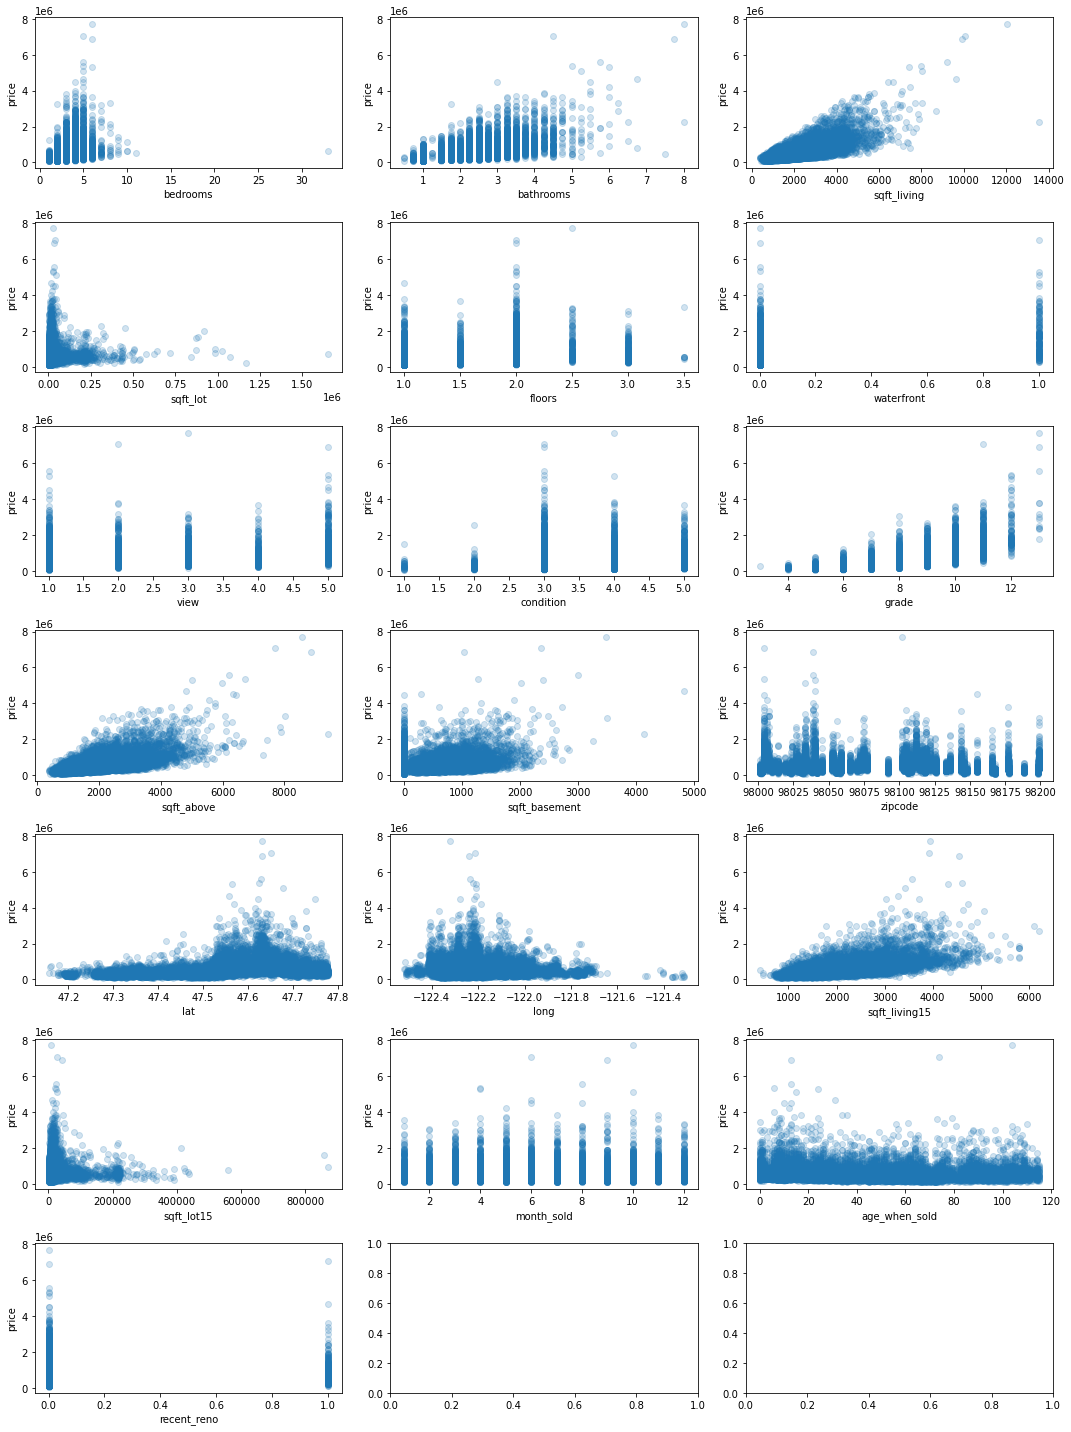

In [200]:
scatterplot_data = df.drop("price",axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df[col], df["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [201]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=df.drop("price",axis=1),
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6968876162042115
Validation score: 0.7137134092756615

Baseline Model
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [202]:
sm.OLS(df['price'], sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2824.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:24   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21578   BIC:                         5.888e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.509e+06   2.87e+06      0.526      0.599   -4.12e+06    7.14e+06
bedrooms       -3.63e+04   1893.367    -19.170      0.000      -4e+04   -3.26e+04
bathrooms       4.11e+04   3246.765     12.659      0.000    3.47e+04    4.75e+04
sqft_living     110.1499      2.270     48.518      0.000     105.700     114.600
sqft_lot          0.1420      0.048      2.972      0.003       0.048       0.236
floors         9134.6137   3585.661      2.548      0.011    2106.454    1.62e+04
waterfront     6.007e+05   1.83e+04     32.759      0.000    5.65e+05    6.37e+05
view            6.13e+04   2359.500     25.982      0.000    5.67e+04    6.59e+04
condition      2.799e+04   2334.588     11.989      0.000    2.34e+04    3.26e+04
grade          9.717e+04   2152.726     45.139      0.000     9.3e+04    1.01e+05
sqft_above       70.7615      2.245     31.519      0.000      66.361      75.162
sqft_basement    39.3889      2.636     14.943      0.000      34.222      44.556
zipcode        -578.7435     32.847    -17.619      0.000    -643.126    -514.361
lat            5.975e+05   1.07e+04     55.930      0.000    5.77e+05    6.18e+05
long          -2.125e+05   1.31e+04    -16.198      0.000   -2.38e+05   -1.87e+05
sqft_living15    22.1472      3.438      6.442      0.000      15.408      28.886
sqft_lot15       -0.3725      0.073     -5.095      0.000      -0.516      -0.229
month_sold    -2745.5243    438.681     -6.259      0.000   -3605.371   -1885.678
age_when_sold  2664.8986     70.095     38.019      0.000    2527.508    2802.289
recent_reno     9.98e+04   1.07e+04      9.291      0.000    7.87e+04    1.21e+05
==============================================================================
Omnibus:                    18420.005   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1905176.508
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.453   Cond. No.                     3.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [203]:
y = df['price']
logprice = np.log1p(y)

In [204]:
logprice

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21592    12.793862
21593    12.899222
21594    12.904461
21595    12.899222
21596    12.691584
Name: price, Length: 21597, dtype: float64

In [205]:
sm.OLS(logprice, sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     4056.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:24   Log-Likelihood:                -833.46
No. Observations:               21597   AIC:                             1705.
Df Residuals:                   21578   BIC:                             1857.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.1320      3.601     -3.092      0.002     -18.189      -4.075
bedrooms         -0.0132      0.002     -5.558      0.000      -0.018      -0.009
bathrooms         0.0698      0.004     17.152      0.000       0.062       0.078
sqft_living    9.584e-05   2.85e-06     33.662      0.000    9.03e-05       0.000
sqft_lot       4.831e-07   5.99e-08      8.066      0.000    3.66e-07    6.01e-07
floors            0.0787      0.004     17.506      0.000       0.070       0.088
waterfront        0.3631      0.023     15.791      0.000       0.318       0.408
view              0.0702      0.003     23.712      0.000       0.064       0.076
condition         0.0638      0.003     21.774      0.000       0.058       0.069
grade             0.1603      0.003     59.372      0.000       0.155       0.166
sqft_above     4.032e-05   2.82e-06     14.322      0.000    3.48e-05    4.58e-05
sqft_basement  5.552e-05   3.31e-06     16.794      0.000     4.9e-05     6.2e-05
zipcode          -0.0006   4.12e-05    -15.653      0.000      -0.001      -0.001
lat               1.3931      0.013    103.980      0.000       1.367       1.419
long             -0.1538      0.016     -9.350      0.000      -0.186      -0.122
sqft_living15  9.846e-05   4.31e-06     22.836      0.000       9e-05       0.000
sqft_lot15    -2.424e-07   9.17e-08     -2.644      0.008   -4.22e-07   -6.27e-08
month_sold       -0.0047      0.001     -8.530      0.000      -0.006      -0.004
age_when_sold     0.0035   8.79e-05     40.061      0.000       0.003       0.004
recent_reno       0.1388      0.013     10.301      0.000       0.112       0.165
==============================================================================
Omnibus:                      410.760   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.660
Skew:                          -0.039   Prob(JB):                    1.74e-188
Kurtosis:                       3.977   Cond. No.                     3.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [206]:
second2_model = LinearRegression()

second2_model_scores = cross_validate(
    estimator=second_model,
    X=df.drop("price",axis=1),
    y=logprice,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", second2_model_scores["train_score"].mean())
print("Validation score:", second2_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.769928057772696
Validation score: 0.7767443659047405

Second Model
Train score:      0.6968876162042115
Validation score: 0.7137134092756615

Baseline Model
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [207]:
#address multicollinearity first

In [208]:
abs(df.corr()) > 0.75


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [209]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

dfcorr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

# set index to pairs
dfcorr.set_index(['pairs'], inplace = True)

#d rop level columns
dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfcorr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfcorr.drop_duplicates(inplace=True)

In [210]:
dfcorr[(dfcorr.cc>.75) & (dfcorr.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


In [211]:
#these are interesting results. let's evaluate the pairs and eliminate sqft_above, year_sold

In [212]:
df = df.drop(['sqft_living'], axis=1)
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,0
2,180000.0,2,1.00,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [ ]:
##use domain knowledge to choose features i want to use
#get rid year sold
#get rid of sq.ft above and sq.ft basementt because sq.living already accounts for that and probably causes much colinearity.
#get rid of 


In [213]:
sm.OLS(logprice, sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     4056.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:42:52   Log-Likelihood:                -833.46
No. Observations:               21597   AIC:                             1705.
Df Residuals:                   21578   BIC:                             1857.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.1320      3.601     -3.092      0.002     -18.189      -4.075
bedrooms         -0.0132      0.002     -5.558      0.000      -0.018      -0.009
bathrooms         0.0698      0.004     17.152      0.000       0.062       0.078
sqft_lot       4.831e-07   5.99e-08      8.066      0.000    3.66e-07    6.01e-07
floors            0.0787      0.004     17.506      0.000       0.070       0.088
waterfront        0.3631      0.023     15.791      0.000       0.318       0.408
view              0.0702      0.003     23.712      0.000       0.064       0.076
condition         0.0638      0.003     21.774      0.000       0.058       0.069
grade             0.1603      0.003     59.372      0.000       0.155       0.166
sqft_above        0.0001    4.6e-06     29.615      0.000       0.000       0.000
sqft_basement     0.0002   5.49e-06     27.570      0.000       0.000       0.000
zipcode          -0.0006   4.12e-05    -15.653      0.000      -0.001      -0.001
lat               1.3931      0.013    103.980      0.000       1.367       1.419
long             -0.1538      0.016     -9.350      0.000      -0.186      -0.122
sqft_living15  9.846e-05   4.31e-06     22.836      0.000       9e-05       0.000
sqft_lot15    -2.424e-07   9.17e-08     -2.644      0.008   -4.22e-07   -6.27e-08
month_sold       -0.0047      0.001     -8.530      0.000      -0.006      -0.004
age_when_sold     0.0035   8.79e-05     40.061      0.000       0.003       0.004
recent_reno       0.1388      0.013     10.301      0.000       0.112       0.165
==============================================================================
Omnibus:                      410.760   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.660
Skew:                          -0.039   Prob(JB):                    1.74e-188
Kurtosis:                       3.977   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#better condition number but still something is very wrong
#probably cuz many of the features, while having numeric values, are not really continuous! they're more categorical

In [214]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_sold',
       'age_when_sold', 'recent_reno'],
      dtype='object')

In [ ]:
numerical = ['sqft_living', 'sqft_lot','sqft_basement','age_when_sold']

In [ ]:
kindaboth = ['bedrooms', 'bathrooms', 'floors']

In [ ]:
categorical = ['waterfront', 'condition', 'grade', 'month_sold','recent_reno']

In [ ]:
for variable in (kindaboth+categorical):
    ax, figure = plt.subplots(1,1,figsize=(15,12))
    sns.boxplot(x=variable, y='price', data=df)
    plt.title("{} vs. price".format(variable))

In [ ]:
#lets get rid of thatt one data point with over 30 bedrooms what!? talk about outlier!

In [ ]:
df2 = df[df['bedrooms'] < 30]


In [ ]:
df2['sqft_basement'].value_counts()

In [ ]:
#df2['sqft_basement'] = df2['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df2.loc[df2['sqft_basement'] > 0, 'sqft_basement'] = 1

In [ ]:
df2

In [ ]:
df2.describe().transpose()

In [ ]:
df2

In [ ]:
#try dropping all categorical

In [ ]:
df3x = df2[(numerical+kindaboth)]
df3y = df2["price"]

In [ ]:
df3x

In [ ]:
df3y

In [ ]:
sm.OLS(df3y, sm.add_constant(df3x)).fit().summary()

In [ ]:
#yikes, this is going the wrong direction. we could have assumed that due to grade and condition being eliminated, which were the
#highest correlated features.

In [ ]:
#lets take a step back or try one hot encoding

In [ ]:
df2

In [ ]:
df2[kindaboth+categorical].nunique()

In [ ]:
df2[categorical].nunique()

In [ ]:
kindacat = kindaboth+categorical
kindacat

In [ ]:
kindacat.append('sqft_basement')

In [ ]:
df_categories = pd.DataFrame()

for cat in categorical:
    df_categories[cat]=df2[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

In [ ]:
df_categories = pd.DataFrame()

for cat in kindacat:
    df_categories[cat]=df2[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

In [ ]:
df_categories

In [ ]:
dfohe= df2.drop(categorical, axis=1)
dfohe = pd.concat([dfohe, df_categories], axis=1)
dfohe.info()

In [ ]:
dfohe= df2.drop(kindacat, axis=1)
dfohe = pd.concat([dfohe, df_categories], axis=1)
dfohe.info()

In [ ]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe.drop("price",axis=1))).fit().summary()

In [ ]:
#not as good as I had hoped for... try the lab version again below

In [ ]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=dfohe.drop("price",axis=1),
    y=dfohe['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#on the right track, kind of. not good enough. try re-choosing best features and some transformations.

In [ ]:
# Run this cell without changes

from sklearn.feature_selection import RFECV
#from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(dfohe.drop("price",axis=1))

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, dfohe['price'])

# Print the results
print("Was the column selected?")
for index, col in enumerate(dfohe.drop("price",axis=1).columns):
    print(f"{col}: {selector.support_[index]}")

In [ ]:
#try out just the features sklearn chose

In [ ]:
RFECV_features = ['sqft_living',

'age_when_sold',
'bedrooms_4',

'floors_3.0',

'waterfront_1',

'condition_3.0',
'condition_4.0',
'condition_5.0',
'bathrooms_7.75',
'grade_7.0',
'grade_8.0',
'grade_9.0',
'grade_10.0',
'grade_11.0',
'grade_12.0',
'grade_13.0',
'recent_reno_1',
'sqft_basement_1']


In [ ]:
RFECV_features = ['bedrooms',
'bathrooms',
'sqft_living',
'sqft_lot',
'floors',
'sqft_basement',
'age_when_sold',
'waterfront_1',
'condition_3.0',
'condition_4.0',
'condition_5.0',
'grade_6.0',
'grade_7.0',
'grade_8.0',
'grade_9.0',
'grade_10.0',
'grade_11.0',
'grade_12.0',
'grade_13.0',
'month_sold_3',
'month_sold_4',
'month_sold_5',
'recent_reno_1']

In [ ]:
dfohe[RFECV_features] 

In [ ]:
dfohe[RFECV_features].hist(figsize = (20,15));

In [ ]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe[RFECV_features])).fit().summary()

In [ ]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=dfohe[RFECV_features],
    y=dfohe['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#marginal improvement. try transforms
len(dfohe)

In [ ]:
dfohe

In [ ]:
dfohe.info()

In [ ]:
dfohe.describe().transpose()

In [ ]:
dfohe.columns

In [ ]:
dfohe

In [ ]:
tolog = numerical+kindaboth
tolog

In [ ]:
tolog.remove('sqft_basement') #remove cuz 0's, alternative is to change to simple categorical
#tolog.remove('age_when_sold') #remove cuz 0's, alternative is to assign all 0 yr houses as 1 yr old.
tolog

In [ ]:
dfohe['age_when_sold'] = dfohe['age_when_sold'].apply(lambda x: .5 if x == 0 else x)
dfohe['sqft_basement'] = dfohe['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dfohe[tolog].hist(figsize = (20,15));

In [ ]:
dfohe

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
RFECV_features.remove("sqft_lot")

In [ ]:
RFECV_features.remove("floors")

In [ ]:
RFECV_features

In [ ]:
#redo test after removing columns

In [ ]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe[RFECV_features])).fit().summary()

In [ ]:
dfohe['age_when_sold'] = dfohe['age_when_sold'].apply(lambda x: 1 if x == 0 else x)

In [ ]:
tolog = ['price','sqft_living']

In [ ]:
tolog = ['sqft_living']

In [ ]:
tolog = ['price']

In [ ]:
dfohelog = dfohe.copy()

In [ ]:
for feat in tolog:
    dfohelog[feat] = dfohelog[feat].map(lambda x: np.log(x))




In [ ]:
dfohelog.describe().transpose()

In [ ]:
dfohelog[tolog].hist(figsize = (20,15));

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog[RFECV_features])).fit().summary()

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog.drop("price",axis=1))).fit().summary()

In [ ]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=dfohelog[RFECV_features],
    y=dfohelog['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()

print("Fourth Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#didn't get better with transformations on numerical dependent variables alone, let do log of price

In [ ]:
dfohelog['price'] = dfohelog['price'].map(lambda x: np.log(x))

In [ ]:
dfohelog['price'].hist(figsize = (6,6));

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog[RFECV_features])).fit().summary()

In [ ]:
#we continue to go in the wrong direction, we should backtrack and re-start from an earlier step where we had dfohe

In [ ]:
dfohe

In [ ]:
dfohe.describe().transpose()

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
numerical.remove('sqft_basement')

In [ ]:
categorical.append('sqft_basement')

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
dfohelog2 = dfohe.copy()
dfohelog2['price'] = dfohelog2['price'].map(lambda x: np.log(x))

In [ ]:
#try just log transform of the Y

In [ ]:
sm.OLS(dfohelog2['price'], sm.add_constant(dfohelog2[RFECV_features])).fit().summary()

In [ ]:
#eh not better, let's try scaling instead

In [ ]:
toscale = ['sqft_living','age_when_sold']

In [ ]:
dfoheminmax = dfohe.copy()

for feature in toscale:
    d_min = dfoheminmax[feature].min()
    d_max = dfoheminmax[feature].max()
    dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)


In [ ]:
dfoheminmax

In [ ]:
dfoheminmax.describe().transpose()

In [ ]:
sm.OLS(dfoheminmax['price'], sm.add_constant(dfoheminmax[RFECV_features])).fit().summary()

In [ ]:
RFECV_features.remove('condition_3.0')

In [ ]:
sm.OLS(dfoheminmax['price'], sm.add_constant(dfoheminmax[RFECV_features])).fit().summary()

In [ ]:
#try standard scalar

In [ ]:
dfohestd = dfohe.copy()

for feature in toscale:
    dfohestd[feature] = (dfohestd[feature]-np.mean(dfohestd[feature]))/np.sqrt(np.var(dfohestd[feature]))
    

In [ ]:
sm.OLS(dfohestd['price'], sm.add_constant(dfohestd[RFECV_features])).fit().summary()

In [ ]:
#not helping

In [ ]:
dfohestd

In [ ]:
dfohestd.describe().transpose()

In [ ]:
dfoheminmax[numerical+kindaboth].hist(figsize = (20,15));

In [ ]:
tolog

In [ ]:
dfohelog

In [ ]:
dfohelogscale = dfohelog.copy()

for feature in toscale:
    dfohelogscale[feature] = (dfohelogscale[feature]-np.mean(dfohelogscale[feature]))/np.sqrt(np.var(dfohelogscale[feature]))
    

In [ ]:
dfohelogscale

In [ ]:
sm.OLS(dfohelogscale['price'], sm.add_constant(dfohelogscale[RFECV_features])).fit().summary()

In [ ]:
RFECV_features

In [ ]:
RFECV_features.remove('sqft_lot')

In [ ]:
RFECV_features.remove('floors')

In [ ]:
RFECV_features.remove('bathrooms')